## Installing finesse package

In [ ]:
pip install finesse

## Importing necessary libraries

In [1]:
import finesse
from finesse import Model
from finesse.components import Laser, Mirror, Beamsplitter, Space, ReadoutDC
import numpy as np
import matplotlib.pyplot as plt
from finesse.analysis.actions import Xaxis

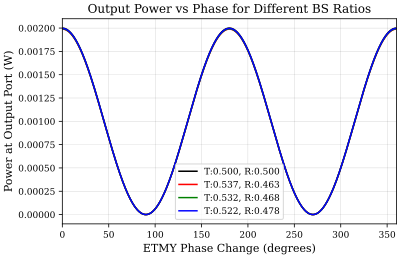

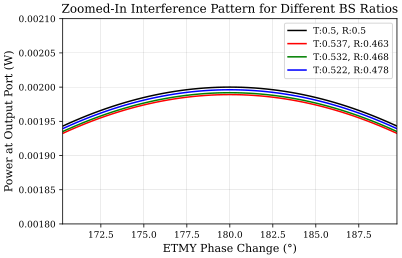

In [2]:
finesse.configure(plotting=True)

# Beam Splitter Ratios
ratios = [(0.5, 0.5), (0.537, 0.463), (0.532, 0.468), (0.522, 0.478)]
colors = ['black', 'red', 'green', 'blue']

plt.figure()

power_outputs = []

for (T, R), color in zip(ratios, colors):
    kat = finesse.Model()
    kat.parse(f"""
        l L0 0.002
        s l_in L0.p1 bs.p1 L=0.25
        bs bs T={T} R={R} alpha=45
        s lx bs.p3 mx.p1 L=0.25
        m mx R=1 T=0 phi=0
        s ly bs.p2 my.p1 L=0.25
        m my R=1 T=0 phi=0
        pd pow_out bs.p4.o
    """)

    # Sweeping phase from 0 to 360 degrees
    out = kat.run(Xaxis("my.phi", "lin", 0, 360, 1000))

    power_outputs.append(out["pow_out"])

    plt.plot(out.x1, out["pow_out"], label=f"T:{T:.3f}, R:{R:.3f}", color=color)

plt.xlabel("ETMY Phase Change (degrees)")
plt.ylabel("Power at Output Port (W)")
plt.title("Output Power vs Phase for Different BS Ratios")
plt.legend()
plt.grid(True)
plt.show()


#Zoomed version of the plot to see the deviations
plt.figure()

for (T, R), color in zip(ratios, colors):
    kat = finesse.Model()
    kat.parse(f"""
        l L0 0.002                    # 2 mW laser
        s l_in L0.p1 bs.p1 L=0.25
        bs bs T={T} R={R} alpha=45

        s lx bs.p3 mx.p1 L=0.25
        m mx R=1 T=0 phi=0

        s ly bs.p2 my.p1 L=0.25
        m my R=1 T=0 phi=0

        pd pow_out bs.p4.o
    """)
    out = kat.run(Xaxis("my.phi", "lin", 0, 360, 1000))

    # Zooming in on a range of (170° to 190°)
    mask = (out.x1 >= 170) & (out.x1 <= 190)
    plt.plot(out.x1[mask], out["pow_out"][mask], label=f"T:{T}, R:{R}", color=color)

plt.xlabel("ETMY Phase Change (°)")
plt.ylabel("Power at Output Port (W)")
plt.title("Zoomed-In Interference Pattern for Different BS Ratios")
plt.legend()
plt.grid(True)


plt.ylim(0.0018, 0.0021)
plt.show()


